Polynomial Regression
>Import libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


>Loading the dataset

In [62]:
df = pd.read_csv('/content/Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


>Data Analysis

In [63]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<ipython-input-64-002f50f95b5f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<function matplotlib.pyplot.show(close=None, block=None)>

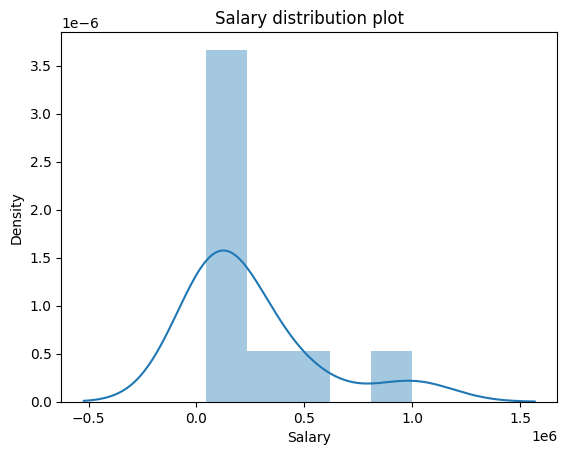

In [64]:
#Salary distribution
plt.title('Salary distribution plot')
sns.distplot(df['Salary'])
plt.show


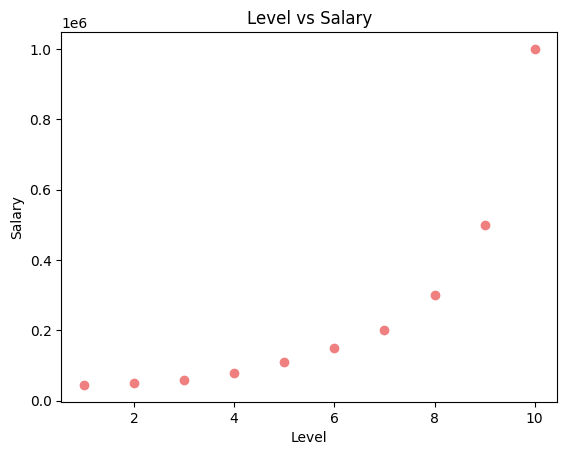

In [65]:
#Scatter plot- level vs salary
plt.title('Level vs Salary')
plt.scatter(x=df['Level'], y = df['Salary'], color = 'lightcoral')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

>Split the dataset into Dependent & Independent variable

In [66]:
X = df.iloc[:, 1: -1].values #independent var
y = df.iloc[:, -1].values #dependent var

**Train the regression models**

> Linear regression model



In [67]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

>Polynomial regression

In [68]:
pr = PolynomialFeatures(degree = 4) #degree of the polynomial
X_poly = pr.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

>Predict the results

In [69]:
#predict the linear regression results
y_pred_lr = lr.predict(X)

#predict the polynomial regression resutls
y_pred_pr = lr2.predict(X_poly)

>Visualization of predictions

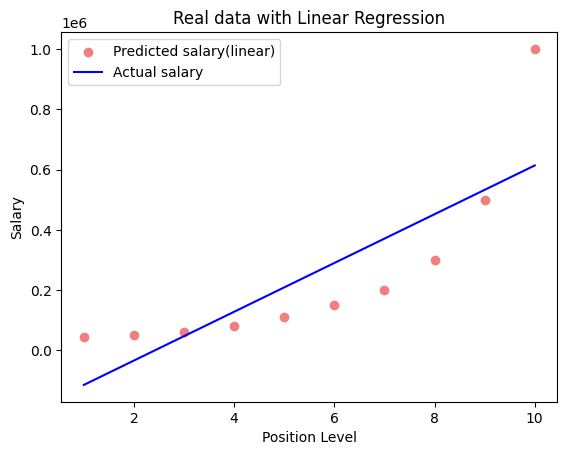

In [70]:
#For linear regression
plt.scatter(X,y, color = 'lightcoral')
plt.plot(X, y_pred_lr, color = 'blue')
plt.title('Real data with Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['Predicted salary(linear)','Actual salary'], loc = 'best', facecolor= 'white')
plt.show()

<ipython-input-71-59cdc5b55c31>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


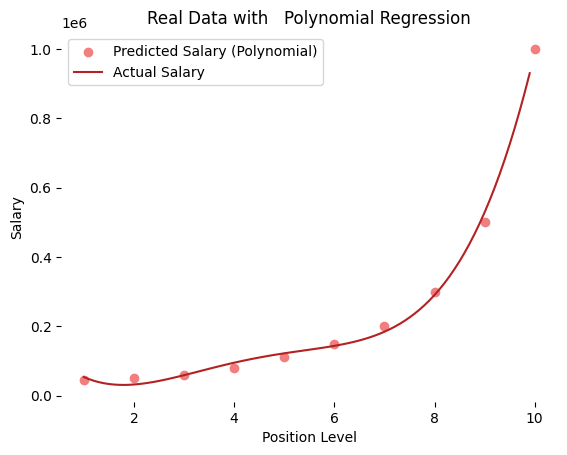

In [71]:
#for polynomial regression

#Finer grid for smoother curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

#plot polynomial regression
plt.scatter(X, y, color='lightcoral')
plt.plot(X_grid, lr2.predict(pr.fit_transform(X_grid)), color='firebrick')
plt.title('Real Data with   Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['Predicted Salary (Polynomial)', 'Actual Salary'], loc='best', facecolor='white')
plt.box(False)
plt.show()

>Test predictions with specific inputs

In [72]:
# Predict with Linear Regression
print(f'Linear Regression Prediction for Level 7.5: {lr.predict([[7.5]])}')

Linear Regression Prediction for Level 7.5: [411257.57575758]


In [73]:
# Predict with Polynomial Regression
print(f'Polynomial Regression Prediction for Level 7.5: {lr2.predict(pr.fit_transform([[7.5]]))}')

Polynomial Regression Prediction for Level 7.5: [225126.29297787]


Task 1: Visualize the dataset using scatter plots and regression lines to compare Linear Regression and Polynomial Regression (degree = 4).

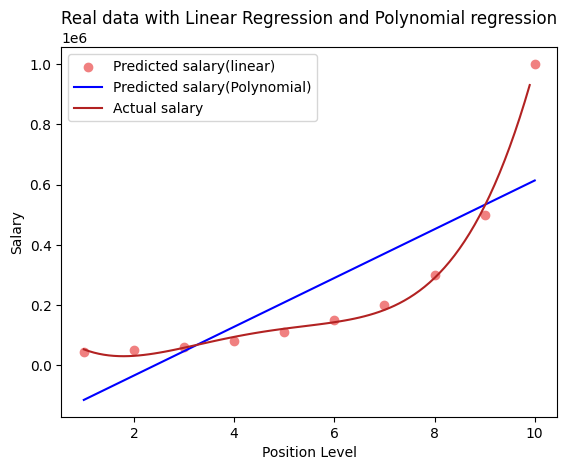

In [19]:
plt.scatter(X,y, color = 'lightcoral')
plt.plot(X, y_pred_lr, color = 'blue')
plt.plot(X_grid, lr2.predict(pr.fit_transform(X_grid)), color='firebrick')
plt.title('Real data with Linear Regression and Polynomial regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['Predicted salary(linear)','Predicted salary(Polynomial)','Actual salary'], loc = 'best', facecolor= 'white')
plt.show()

 Task 2: Train and evaluate Polynomial Regression models with degrees 2, 3, and 5. Compare their R-squared scores to identify the best-fitting model.

In [21]:
pr = PolynomialFeatures(degree = 2) #degree 2 polynomial
X_poly2 = pr.fit_transform(X)
lr3 = LinearRegression()
lr3.fit(X_poly2, y)
y2_pred = lr3.predict(X_poly2)

In [22]:
pr = PolynomialFeatures(degree = 3) #degree 3 polynomial
X_poly3 = pr.fit_transform(X)
lr4 = LinearRegression()
lr4.fit(X_poly3, y)
y3_pred = lr4.predict(X_poly3)

In [23]:
pr = PolynomialFeatures(degree = 5) #degree 5 polynomial
X_poly4 = pr.fit_transform(X)
lr5 = LinearRegression()
lr5.fit(X_poly4, y)
y5_pred = lr5.predict(X_poly4)

r2 scores for evaluation

In [2]:
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
#evaluation for degree 2 polynomial
mse_1 = mean_squared_error(y, y2_pred)
r2_1 = r2_score(y, y2_pred)

In [25]:
#evaluation for degree 3 polynomial
mse_2 = mean_squared_error(y, y3_pred)
r2_2 = r2_score(y, y3_pred)

In [26]:
#evaluation of degree 5 polynomial
mse_3 = mean_squared_error(y, y5_pred)
r2_3 = r2_score(y, y5_pred)

In [27]:
print(f'MSE for degree 2 polynomial: {mse_1}')
print(f'R2 score for degree 2 polynomial: {r2_1}')

MSE for degree 2 polynomial: 6758833333.333338
R2 score for degree 2 polynomial: 0.9162082221443942


In [28]:
print(f'MSE for degree 3 polynomial: {mse_2}')
print(f'R2 score for degree 3 polynomial: {r2_2}')

MSE for degree 3 polynomial: 1515662004.6620114
R2 score for degree 3 polynomial: 0.9812097727913366


In [29]:
print(f'MSE for degree 5 polynomial: {mse_3}')
print(f'R2 score for degree 5 polynomial: {r2_3}')

MSE for degree 5 polynomial: 16382284.38228488
R2 score for degree 5 polynomial: 0.9997969027099755


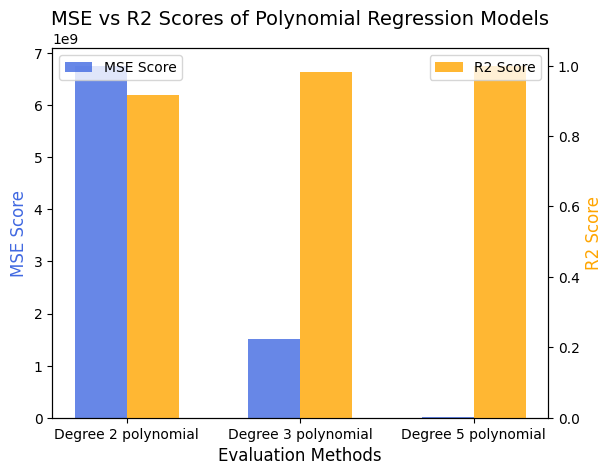

In [36]:

#Visualizing the evaluation scores
X_axis = ["Degree 2 polynomial", "Degree 3 polynomial", "Degree 5 polynomial"]
mse_scores = [mse_1, mse_2, mse_3]
r2_scores = [r2_1, r2_2, r2_3]
bar_width = 0.3
index = range(len(X_axis))

fig, ax1 = plt.subplots()

# Plot MSE scores on primary y-axis
ax1.bar(index, mse_scores, width=bar_width, label="MSE Score", color='royalblue', alpha=0.8)
ax1.set_ylabel("MSE Score", color='royalblue', fontsize=12)

# Create a secondary y-axis for R2 scores
ax2 = ax1.twinx()
ax2.bar([i + bar_width for i in index], r2_scores, width=bar_width, label="R2 Score", color='orange', alpha=0.8)
ax2.set_ylabel("R2 Score", color='orange', fontsize=12)

# Labels and title
ax1.set_xlabel("Evaluation Methods", fontsize=12)
ax1.set_title("MSE vs R2 Scores of Polynomial Regression Models", fontsize=14)
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(X_axis)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

plt.show()

>Task 3: Implement and plot predictions for Polynomial Regression with Ridge
regularization (degree = 4).


In [40]:
from sklearn.linear_model import Ridge


In [50]:
ridge_reg  = Ridge(alpha =50, max_iter = 100, tol = 0.1)
ridge_reg.fit(X_poly, y)
y_pred_ridge = ridge_reg.predict(X_poly)
ridge_reg.score(X_poly, y)

0.986894196998705

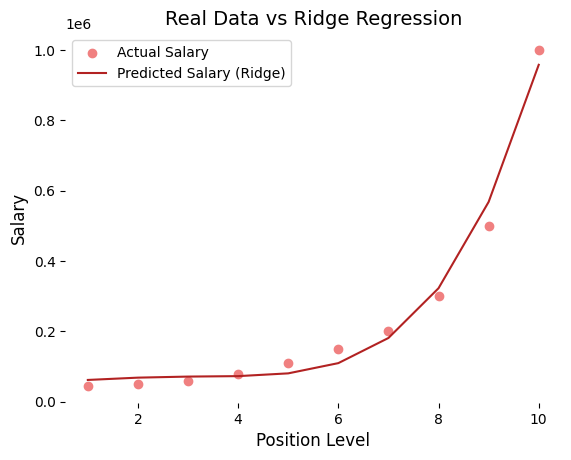

In [49]:
import matplotlib.pyplot as plt

# Scatter plot for real data
plt.scatter(X, y, color='lightcoral', label='Actual Salary')

# Line plot for Ridge Regression predictions
plt.plot(X, y_pred_ridge, color='firebrick', label='Predicted Salary (Ridge)')

# Titles and labels
plt.title('Real Data vs Ridge Regression', fontsize=14)
plt.xlabel('Position Level', fontsize=12)
plt.ylabel('Salary', fontsize=12)

# Legend
plt.legend(loc='best', facecolor='white')

# Remove plot borders
plt.box(False)

# Show the plot
plt.show()


In [48]:
print("X_grid shape:", X.shape)
print("y_pred_ridge shape:", y_pred_ridge.shape)


X_grid shape: (10, 1)
y_pred_ridge shape: (10,)


>Task 4: Calculate and compare Mean Absolute Error (MAE) and Mean Squared
Error (MSE) for both Linear and Polynomial Regression models.

In [51]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, y_pred_lr)
mse = mean_squared_error(y, y_pred_lr)

In [52]:
print(f'MAE for Linear Regression: {mae}')
print(f'MSE for Linear Regression: {mse}')

MAE for Linear Regression: 128454.54545454546
MSE for Linear Regression: 26695878787.878784


>Task 5: Use the trained Polynomial Regression model to predict salaries for
Levels 6.5, 8.0, and 9.0. Visualize these predictions on the original dataset plot.

In [76]:
#predictions
print(f'Polynomial Regression Prediction for Level 6.5: {lr2.predict(pr.fit_transform([[6.5]]))}')
print(f'Polynomial Regression Prediction for Level 8: {lr2.predict(pr.fit_transform([[8]]))}')
print(f'Polynomial Regression Prediction for Level 9: {lr2.predict(pr.fit_transform([[9]]))}')

Polynomial Regression Prediction for Level 6.5: [158862.45265155]
Polynomial Regression Prediction for Level 8: [289994.17249417]
Polynomial Regression Prediction for Level 9: [528694.63869462]


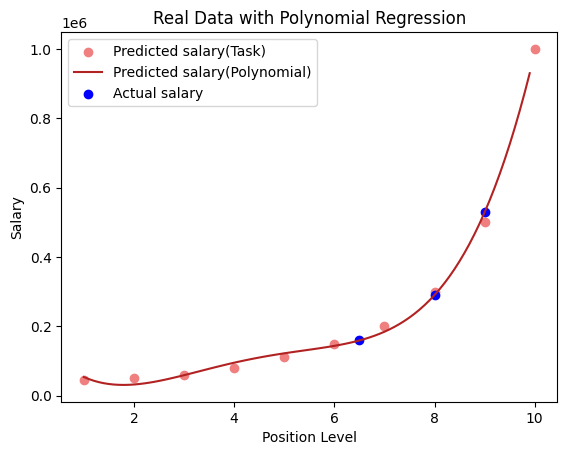

In [79]:
levels = [6.5, 8, 9]
predictions = [lr2.predict(pr.fit_transform([[level]]))[0] for level in levels]

plt.scatter(X,y, color = 'lightcoral')
plt.plot(X_grid, lr2.predict(pr.fit_transform(X_grid)), color='firebrick')
plt.scatter(levels, predictions, color='blue', label='Predicted Salaries')
plt.title('Real Data with Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['Predicted salary(Task)','Predicted salary(Polynomial)','Actual salary'], loc = 'best', facecolor= 'white')
